**Question 5** -
Write a program to download the data from the given API link and then extract the following data with
proper formatting
Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
Note - Write proper code comments wherever needed for the code understanding
Sample Data -
Excepted Output Data Attributes -
● id - int url - string
● name - string season
● - int number - int
● type - string airdate -
● date format airtime -
● 12-hour time format
● runtime - float
● average rating - float
● summary - string
● without html tags
● medium image link - string
● Original image link - string


**Ans**

In [1]:
import pandas as pd
import requests
from datetime import datetime

def download_data(data):
    """
    Download data from provided link
    
    Arg:
       Link: Link to the data
       
       Returns: data as a Pandas Dataframe
    """

    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        data = data['_embedded']['episodes']
        return pd.DataFrame(data)
    else:
        return Exception("Error in downloading data: {}".format(response.status_code))

In [3]:
def read_data(data):
    """
    Read data and convert into structured data
    
    Args:
       data: Data as a Pandas dataframe
       
       Returns: Data as Structured data
    """
    # Selecting the desired attributes
    attributes = ['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
                  'runtime', 'rating', 'image', 'summary']

    # Renaming the columns
    data = data[attributes]
    data.columns = ['id','url','name','season','number','type','airdate','airtime',
                    'runtime','average_rating','image','summary']

    # Converting the airdate column to datetime format
    data['airdate'] = pd.to_datetime(data['airdate'])

    # first convert airtime column to datetime column
    data['airtime'] = pd.to_datetime(data['airtime'], format='%H:%M')

    # Convert to 12-hour time format
    data['airtime'] = data['airtime'].dt.strftime('%I:%M %p')


    #Extract medium and original image link from image column
    data['medium_image_link'] = data["image"].apply(lambda x: x['medium'])
    data['Original_image_link'] = data["image"].apply(lambda x: x['original'])

    # Remove html tag from summary column
    data['summary'] = data['summary'].apply(lambda x: x.replace("<p>", "").replace("</p>", ""))

    data = data.drop(columns=['image'],axis=1)

    return data

In [5]:
def save_data_as_csv(data, filename):
    """
    Saves the data as a CSV file.

    Args:
        data: The data as a Pandas DataFrame.
        filename: The name of the CSV file.
    """
    data.to_csv(filename, index=False)


if __name__ == "__main__":
    # Get the link to the data
    url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

    # Download the data
    data = download_data(url)

    # Convert the data into the proper structure
    structured_data = read_data(data)

    # Save the data as a CSV file
    save_data_as_csv(structured_data, "Excel_Csv/Episode_data.csv")

C:\Users\miqba\AppData\Local\Temp\ipykernel_27092\3688609962.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['airdate'] = pd.to_datetime(data['airdate'])
C:\Users\miqba\AppData\Local\Temp\ipykernel_27092\3688609962.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['airtime'] = pd.to_datetime(data['airtime'], format='%H:%M')
C:\Users\miqba\AppData\Local\Temp\ipykernel_27092\3688609962.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [7]:
data = pd.read_csv('Excel_Csv/Episode_data.csv')
data.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,Original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,{'average': 8},A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,{'average': 7.7},Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,{'average': 7.6},Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,{'average': 7.9},While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,{'average': 8},Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


**Question 8** -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

**Ans**

In [86]:
# import standard library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('Excel_Csv/Episode_data.csv')
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,Original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,{'average': 8},A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,{'average': 7.7},Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,{'average': 7.6},Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,{'average': 7.9},While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,{'average': 8},Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


### Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on

In [88]:
import ast
df['average_rating'] = df['average_rating'].apply(lambda x: ast.literal_eval(x)['average'])

### Get all the episode names, whose average rating is more than 8 for every season

In [89]:
episodes_rating_more_8_every_season = df[df['average_rating'] > 8]
episodes_rating_more_8_every_season = episodes_rating_more_8_every_season[['name','season','average_rating']]
episodes_rating_more_8_every_season

,name,season,average_rating
6,Trompe L'Oeil,1,8.6
8,The Well-Tempered Clavier,1,8.5
9,The Bicameral Mind,1,8.7
17,Kiksuya,2,8.7
18,Vanishing Point,2,8.4
19,The Passenger,2,8.5


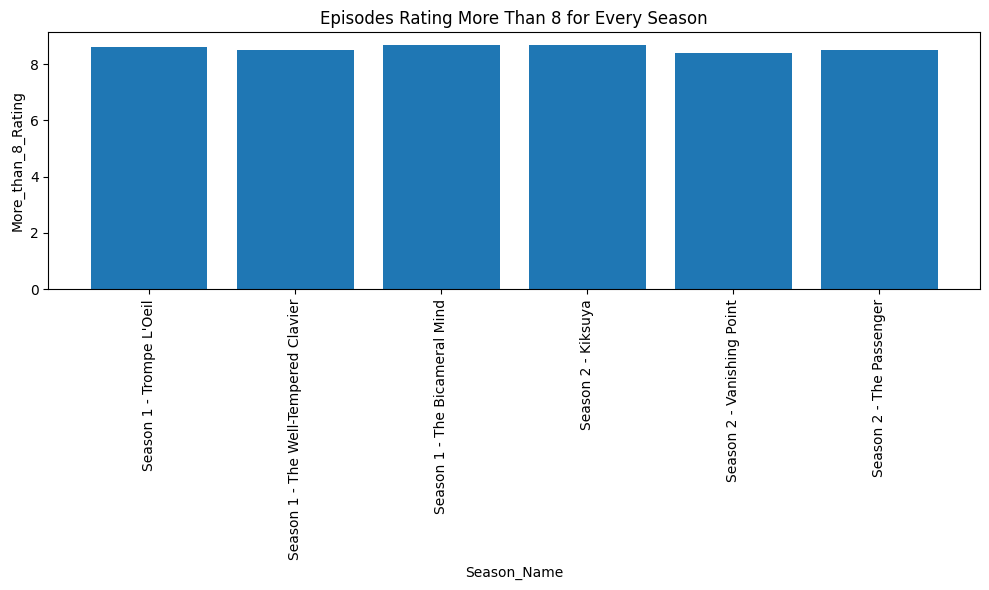

In [90]:


# Plotting
plt.figure(figsize=(10, 6))
plt.bar([f"Season {s} - {n}" for s, n in zip(episodes_rating_more_8_every_season['season'],
                                              episodes_rating_more_8_every_season['name'])], episodes_rating_more_8_every_season['average_rating'],)
plt.xlabel('Season_Name')
plt.ylabel('More_than_8_Rating')
plt.title('Episodes Rating More Than 8 for Every Season')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

### Get all the episode names that aired before May 2019

In [91]:
df.columns

Index(['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'runtime', 'average_rating', 'summary', 'medium_image_link',
       'Original_image_link'],
      dtype='object')

In [92]:
df['airdate'] = pd.to_datetime(df['airdate'])
episode_name_aired_before_May_2019 = df[df['airdate'] < '2019-05-01']
episode_name_aired_before_May_2019 = episode_name_aired_before_May_2019[['name','airdate']]
episode_name_aired_before_May_2019

,name,airdate
0,The Original,2016-10-02
1,Chestnut,2016-10-09
2,The Stray,2016-10-16
3,Dissonance Theory,2016-10-23
4,Contrapasso,2016-10-30
5,The Adversary,2016-11-06
6,Trompe L'Oeil,2016-11-13
7,Trace Decay,2016-11-20
8,The Well-Tempered Clavier,2016-11-27
9,The Bicameral Mind,2016-12-04


In [93]:
episode_name_aired_before_May_2019['year']=episode_name_aired_before_May_2019['airdate'].dt.year
episode_name_aired_before_May_2019

,name,airdate,year
0,The Original,2016-10-02,2016
1,Chestnut,2016-10-09,2016
2,The Stray,2016-10-16,2016
3,Dissonance Theory,2016-10-23,2016
4,Contrapasso,2016-10-30,2016
5,The Adversary,2016-11-06,2016
6,Trompe L'Oeil,2016-11-13,2016
7,Trace Decay,2016-11-20,2016
8,The Well-Tempered Clavier,2016-11-27,2016
9,The Bicameral Mind,2016-12-04,2016


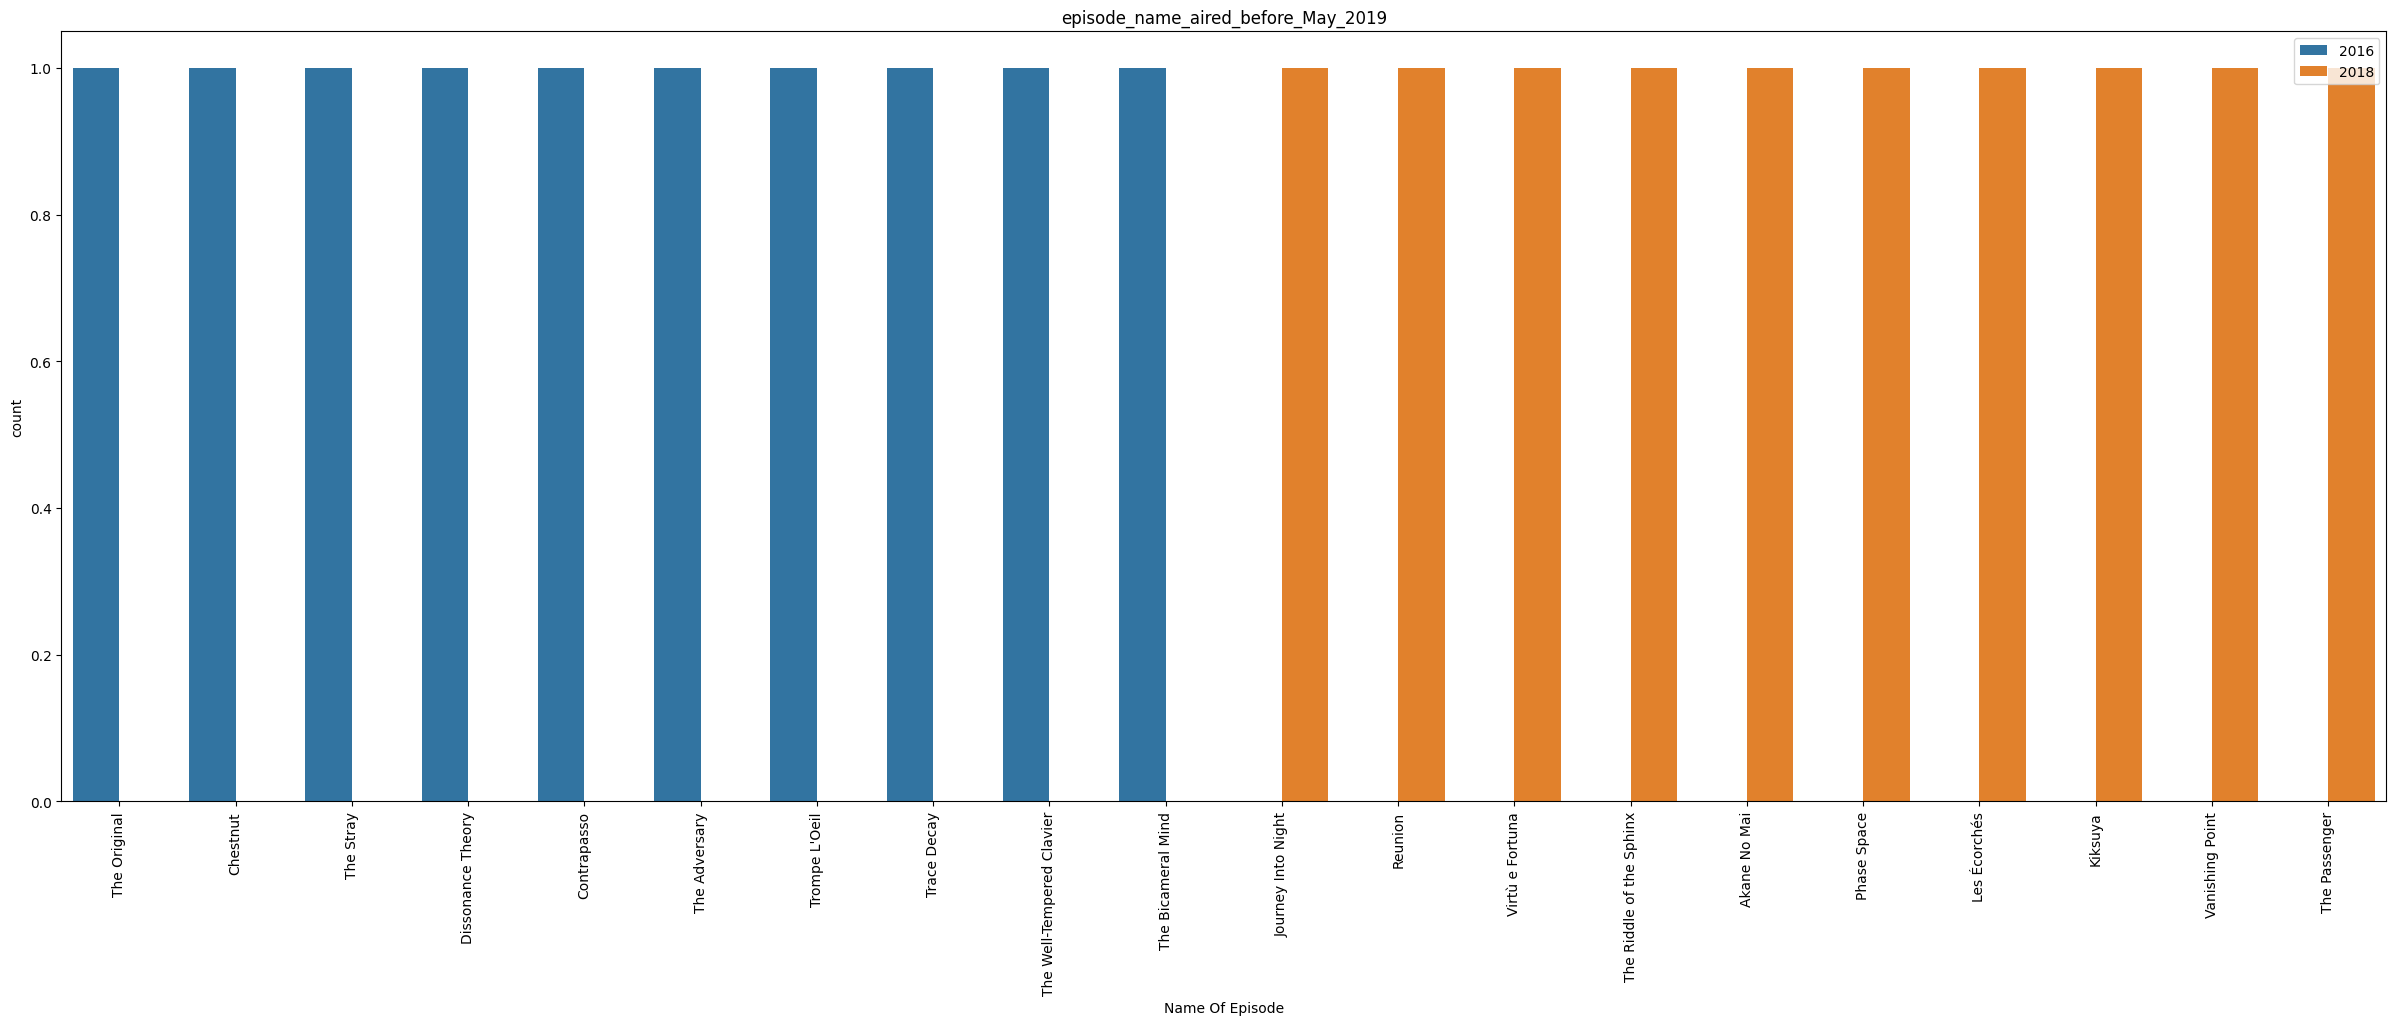

In [76]:
plt.figure(figsize=(30,10))
sns.countplot(data=episode_name_aired_before_May_2019,x='name',hue='year')
plt.xlabel('Name Of Episode')
plt.title('episode_name_aired_before_May_2019')
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')
plt.show()

### Get the episode name from each season with the highest and lowest rating

In [100]:
df.groupby('season')

In [101]:
# Group the data by season
season_groups = df.groupby('season')

# Initialize an empty dictionary to store the most popular episodes for each season
most_popular_episodes = {}

# Iterate over each group (season) and find the episode with the highest rating
for season, group in season_groups:
    most_popular_episode = group.loc[group['average_rating'].idxmax()]
    most_popular_episodes[season] = most_popular_episode

# Print the summary for the most popular episode in each season
for season, episode in most_popular_episodes.items():
    print(f"Season {season}: {episode['name']}")
    print(f"Summary: {episode['summary']}")
    print()


Season 1: The Bicameral Mind
Summary: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season 2: Kiksuya
Summary: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season 3: Parce Domine
Summary: If you're stuck in a loop, try walking in a straight line.

Season 4: Zhuangzi
Summary: God is bored.

